# 数据预处理

## 从off文件，均匀采样N个点，形成点云数据

## 采样后的点云数据， 进行归一化，中心化
从 stanford 获取的 modelnet40_ply_hdf5_2048，可视化为： 
![d](imgs/ply_h5.png)

直接将原始的off文件，进行均匀采样，得到的点云数据可视化为：
![dd](imgs/off_raw.png)
进行数据的归一化，中心化，得到的数据为:
![ddd](imgs/off_h5.png)
### 这里最大最小值归一化，若max = min ,会出现除以0的情况
$$ 
\hat{x} = \frac {x - x_{min}} {x_{max} - x_{min}} 
$$
这里设置一个$$
{x_{max} - x_{min}} < 1^{-5} = 1^{-5}
$$
为了不让出现nan数据的情况。归一化之后再做中心化
$$
x-x_{mean}
$$
得到一个，点云的原点在点云的质心，而且点云数据的大小为[0,1]
如果不做这个处理，训练起来收敛慢，而且准确率比较低，难提高。


## 对数据集中的点云数据，使用h5文件格式存储

## 对训练集进行Shuffle 很重要， 不然读取到的都是一个类别的数据，难训练



### 为for循环加进度条

In [2]:
from tqdm import tqdm
import time
for i in tqdm(range(1000)):
    time.sleep(0.1)
    pass

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.83it/s]


![](https://img-blog.csdn.net/20180218151428503?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvcXFfNDA2NjYwMjg=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
https://blog.csdn.net/qq_40666028/article/details/79335961

In [18]:
with open('data/data.txt') as f:
    content = f.readlines()
acc =[]
for line in content:
    ele = line.replace('\n', '').replace(' ','').split(',')
    temp = []
    for num in ele:
        x = num.split(':')
        if len(x) > 1:
            temp.append(float(x[1]))
    acc.append(temp)
#print(acc)
import numpy as np
data = np.array(acc)


In [19]:
with open('data/data_submean.txt') as f:
    content = f.readlines()
acc =[]
for line in content:
    ele = line.replace('\n', '').replace(' ','').split(',')
    temp = []
    for num in ele:
        x = num.split(':')
        if len(x) > 1:
            temp.append(float(x[1]))
    acc.append(temp)
#print(acc)
data2 = np.array(acc)
print(data2[:,1])

[0.429849 0.559789 0.597582 0.620035 0.645636 0.658641 0.668902 0.674896
 0.689018 0.689627 0.698568 0.701006 0.708219 0.711064 0.719394 0.714112
 0.721731 0.722747 0.725287 0.74459  0.755156]


In [84]:
%matplotlib inline
def plotxy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None,title = None, figsize=(3.5, 2.5)):
    import matplotlib.pyplot as plt
    plt.figure.figsize= figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_vals,y_vals)
#     if x2_vals.any():
#         plt.plot(x2_vals, y2_vals, linestyle=':')
#         plt.legend(legend)

def plotXY(x,y,x2 = None ,y2=None,xlabel = 'Epochs', ylabel = 'Acc',
           legend=None,title = None, figsize=(3.5, 2.5)):
    
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
      # # 设置xtick和ytick的方向：in、out、inout
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'
    plt.figure.figsize= figsize
    #取消图例的外边框

    fig,ax = plt.subplots()


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if title:
        ax.set_title(title ,fontsize=12,color='r')
    #步长
    yticks = np.arange(0, 1, 0.1)
    ax.set_yticks(yticks)
    #xticks = range(0,501,100)
    #ax.set_xticks(xticks)

  

    #限幅

    """set min and max value for axes"""
    #ax.set_ylim([0,9000])
    #ax.set_xlim([0,500])

#     x = data[:,0]
#     old = data[:,1]
#     new = data [:,2]
    #label="Old stratedy"
    #label="New strategy"
    line1 = plt.plot(x,y) #label="Old strategy"
    if x2:
        line2 = plt.plot(x2,y2)
        #plt.legend([line1, line2], ['1', '2'], loc='upper left',frameon=False)


    """open the grid"""
    plt.grid(False)
    #图例的位置，不显示边框
    #plt.legend(loc='upper left',frameon=False)
    #plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)

    plt.show()

#*Data 可变对象
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def plot_Lines(*Data,label, xlabel = 'Epochs', ylabel = 'Acc',
           legend=None,title = None, figsize=(3.5, 2.5)):
    

      # # 设置xtick和ytick的方向：in、out、inout
    matplotlib.rcParams['xtick.direction'] = 'in'
    matplotlib.rcParams['ytick.direction'] = 'in'
    
  
    #取消图例的外边框
    
    
    fig,ax = plt.subplots(figsize = figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if title:
        ax.set_title(title ,fontsize=12,color='r')
    #步长
    yticks = np.arange(0, 1, 0.1)
    ax.set_yticks(yticks)
    #xticks = range(0,501,100)
    #ax.set_xticks(xticks)

  

    #限幅

    """set min and max value for axes"""
    #ax.set_ylim([0,9000])
    #ax.set_xlim([0,500])

#     x = data[:,0]
#     old = data[:,1]
#     new = data [:,2]
    #label="Old stratedy"
    #label="New strategy"
    lines = []
    for i, data in enumerate(Data):
        print(label[i])
        line = plt.plot(data[0],data[1], label=label[i])
        #lines.append(line)
        
    #plt.legend(lines, list(map(lambda x : str(x), range(len(lines)))), loc='upper left',frameon=False)


    """open the grid"""
    plt.grid(False)
    #图例的位置，不显示边框
    plt.legend(loc='upper right',frameon=False)
    plt.legend(bbox_to_anchor=(1.0, 0.9), loc=1, borderaxespad=0.)

    plt.show()

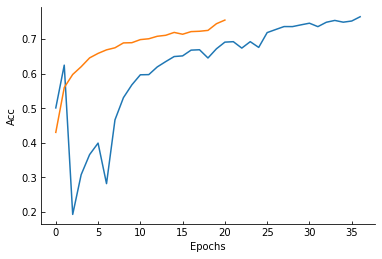

In [80]:
plotXY(range(0,data[:,1].shape[0]), data[:,1], range(data2[:,1].shape[0]), data2[:,1])


sub_mean_data_PointNet
min_max_sub_min_PointNet
DGCNN


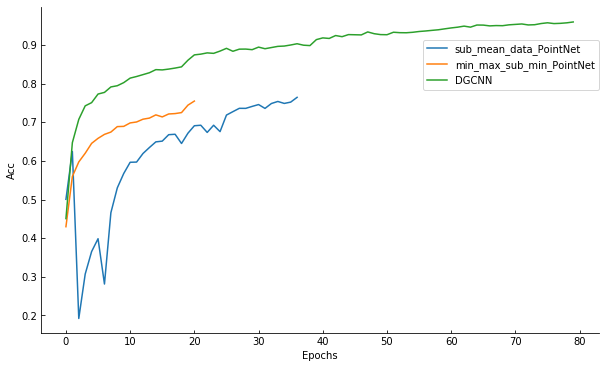

In [85]:
data_lines = [(list(range(0,data[:,1].shape[0])), data[:,1]), (list(range(data2[:,1].shape[0])), data2[:,1]),(list(range(data3[:,1].shape[0])), data3[:,1])]
label = ["sub_mean_data_PointNet","min_max_sub_min_PointNet","DGCNN"]
plot_Lines(*data_lines,label = label,figsize = (10,6))

In [36]:
import numpy as np
with open('data/data_dgcnn.txt') as f:
    content = f.readlines()
acc =[]
for line in content:
    ele = line.replace('\n', '').replace(' ','').split(',')
    temp = []
    for num in ele:
        x = num.split(':')
        if len(x) > 1:
            temp.append(float(x[1]))
    acc.append(temp)
#print(acc)
data3 = np.array(acc)
print(data3[:,1])

[0.450777 0.647465 0.707711 0.742761 0.751092 0.773341 0.777608 0.79173
 0.79488  0.802906 0.814589 0.818754 0.823631 0.828508 0.836534 0.835822
 0.837956 0.840597 0.843747 0.860916 0.874733 0.876664 0.879915 0.878696
 0.884588 0.8917   0.88408  0.889566 0.889769 0.888245 0.894849 0.890684
 0.893732 0.896779 0.897592 0.900335 0.903586 0.899827 0.898811 0.914254
 0.918724 0.917302 0.92482  0.921873 0.927258 0.926852 0.926445 0.934166
 0.929595 0.927258 0.926953 0.933354 0.932236 0.932033 0.933252 0.935284
 0.936605 0.93823  0.939754 0.942192 0.944529 0.946459 0.949202 0.946561
 0.952047 0.951844 0.949812 0.950625 0.95032  0.952555 0.953673 0.95479
 0.95225  0.95286  0.955908 0.957838 0.955806 0.956416 0.957736 0.959972]


# DGCNN
## acc 比较高，但是训练时间非常长
### 一个Epoch 11分钟
### 计算流程
```python
torch.Size([2, 3, 2000])
get graph feature :torch.Size([2, 6, 2000, 20])
conv1 :torch.Size([2, 64, 2000, 20])
max arrg :torch.Size([2, 64, 2000])
get graph feature :torch.Size([2, 128, 2000, 20])
convx2 :torch.Size([2, 64, 2000, 20])
max arrg x2 :torch.Size([2, 64, 2000])
get x2 graph feature :torch.Size([2, 128, 2000, 20])
convx2 :torch.Size([2, 128, 2000, 20])
max arrg x3 :torch.Size([2, 128, 2000])
get x3 graph feature :torch.Size([2, 256, 2000, 20])
convx4 :torch.Size([2, 256, 2000, 20])
max arrg x4 :torch.Size([2, 256, 2000])
cat x1 x2 x3 x4 torch.Size([2, 512, 2000])
convx5 :torch.Size([2, 1024, 2000])
x1 x2 cat x shape :torch.Size([2, 1024]),torch.Size([2, 1024]),torch.Size([2, 2048])
```

## 

In [15]:
print(content[1].split(','))

['Train 1', ' loss: 2.216696', ' train acc: 0.624593', ' train avg acc: 0.463335\n']


In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def draw_Point_Cloud(Points, Lables=None, axis=True, **kags):

    x_axis = Points[:, 0]
    y_axis = Points[:, 1]
    z_axis = Points[:, 2]
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.scatter(x_axis, y_axis, z_axis, c=Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10, azim=235)
    if not axis:
        # 关闭显示坐标轴
        plt.axis('off')

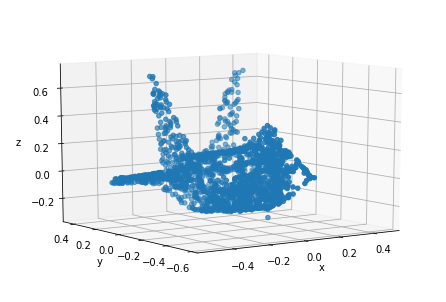

In [89]:
import h5py
with h5py.File('points.h5','r') as f:
    data = f['data'][:]
    
draw_Point_Cloud(data)

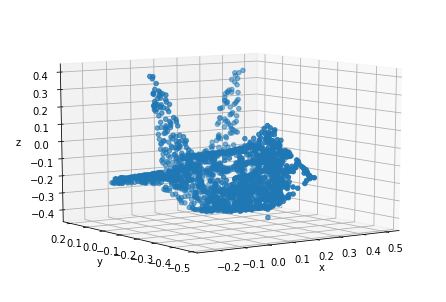

In [140]:
import numpy as np
def translate_pointcloud(pointcloud):
    xyz1 = np.random.uniform(low=2. / 3., high=3. / 2., size=[3])
    xyz2 = np.random.uniform(low=-0.2, high=0.2, size=[3])
    translated_pointcloud = np.add(np.multiply(pointcloud, xyz1), xyz2).astype('float32')
    return translated_pointcloud

translate_points = translate_pointcloud(data)
draw_Point_Cloud(translate_points)

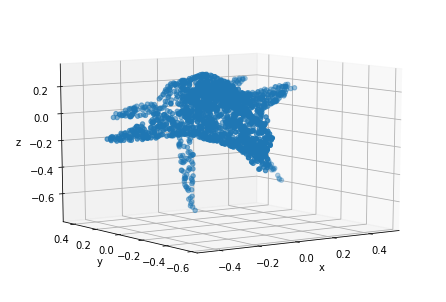

In [98]:
def rotate_point_clouds(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
    rotation is per shape based along up direction
    Input:
      BxNx3 array, original batch of point clouds
    Return:
      BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

def rotate_point_cloud(point_cloud):
    """ Randomly rotate the point clouds to augument the dataset
    rotation is per shape based along up direction
    Input:
      Nx3 array, original batch of point clouds
    Return:
      Nx3 array, rotated batch of point clouds
    """
    
    #随机一个角度，然后构建旋转角度
    rotation_angle = np.random.uniform() * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    #绕y轴旋转
    rotation_matrix = np.array([[cosval, 0, sinval],
                                [0, 1, 0],
                                [-sinval, 0, cosval]])
    # 绕x，z
    
    rotated_data = np.dot(point_cloud, rotation_matrix)
    return rotated_data


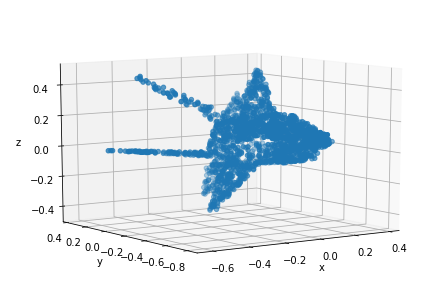

In [141]:

rdata = rotate_point_cloud(translate_pointcloud(data))

draw_Point_Cloud(rdata)

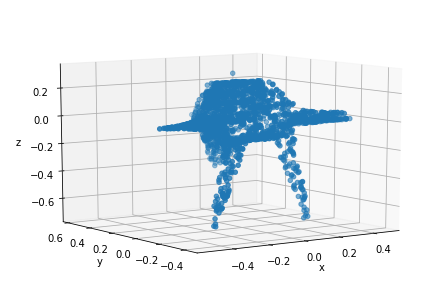

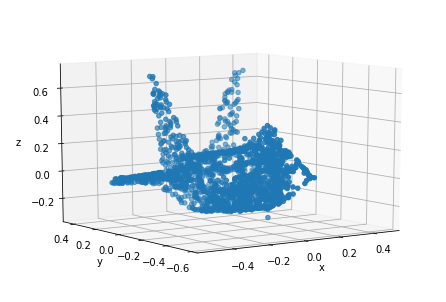

In [133]:
def rotate_point_cloud_by_angle(point_cloud, rotation_angle, axis = 0):
    """ Randomly rotate the point clouds to augument the dataset
    rotation is per shape based along up direction
    Input:
    Nx3 array, original batch of point clouds
    Return:
    Nx3 array, rotated batch of point clouds
    """
    
    #一个角度，然后构建旋转角度
    #rotation_angle = np.random.uniform() * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    #y
    if(axis == 0):
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
    #z
    elif (axis == 1):
        rotation_matrix = np.array([[cosval,-sinval, 0 ],
                                [sinval, cosval, 0],
                                [0, 0, 1]])
    else:
        rotation_matrix = np.array([[1,0, 0 ],
                            [0,cosval ,-sinval],
                            [0, sinval, cosval]])

    rotated_data = np.dot(point_cloud, rotation_matrix)
    return rotated_data

rdata_by_angle = rotate_point_cloud_by_angle(data, -np.pi,axis = 3)
draw_Point_Cloud(rdata_by_angle)
draw_Point_Cloud(data)